In [1]:
import requests
from bs4 import BeautifulSoup


In [2]:
# 이미지 저장 디렉터리 생성
import os
os.makedirs('downloaded_images', exist_ok=True)


In [3]:
# 위키미디어 공용의 특정 카테고리 URL
img_url = 'https://commons.wikimedia.org/wiki/Category:Apple'
# img_url = 'https://commons.wikimedia.org/wiki/Category:Bicycles'


In [4]:
response = requests.get(img_url)
soup = BeautifulSoup(response.text, 'html.parser')


In [5]:
########################################################################
### Crawling & Labelling
### 1. 폴더 구분

In [6]:
#### 크롤링을 통한 이미지 수집
# 다운로드된 이미지 수
downloaded_images = 0

for item in soup.find_all('div', class_='gallerytext'):
    if downloaded_images >= 10:  # 다운로드 이미지 갯수한정
        break

    a_tag = item.find('a')
    if a_tag:
        img_page_url = 'https://commons.wikimedia.org' + a_tag.get('href')

        img_page_response = requests.get(img_page_url)
        img_page_soup = BeautifulSoup(img_page_response.text, 'html.parser')
        img_tag = img_page_soup.find('div', class_='fullImageLink').find('a')
        img_url = img_tag.get('href')
        print(img_url)
        # 파일 확장자 검사
        if img_url.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            try:
                headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
                  # (일부)웹 서버에서 User-Agent 헤더를 검사, 브라우저가 아닌 클라이언트의 요청 차단
                  # requests.get() 함수에 웹 브라우저의 User-Agent 값을 포함하는 헤더를 추가하여 다운로드 시도
                img_data = requests.get(img_url, headers=headers).content

                # Colab 루트 디렉토리에 'downloaded_images' 폴더를 생성하고 이미지 저장
                # filename = os.path.join('/content/downloaded_images', img_url.split('/')[-1])
                filename = '/content/m/'+img_url.split('/')[-1]

                with open(filename, 'wb') as f:
                    f.write(img_data)
                print(f'이미지가 저장되었습니다: {filename}')
                downloaded_images += 1
            except Exception as e:
                print(f"이미지 다운로드 중 오류 발생: {e}")
        else:
            print(f'지원되지 않는 파일 형식: {img_url}')

In [7]:
########################################################################
### Crawling & Labelling
### 2. 파일명에 라벨 포함

# filename = f'{category_prefix}_{downloaded_images+1}{file_extension}'

In [8]:
# 이미지 저장 함수
def download_images1(url, category_prefix):
    # 이미지를 저장할 디렉터리 생성
    # os.makedirs('downloaded_images/s', exist_ok=True)

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # 다운로드된 이미지 수
    downloaded_images = 0

    for item in soup.find_all('div', class_='gallerytext'):
        if downloaded_images >= 5:
            break

        a_tag = item.find('a')
        if a_tag:
            img_page_url = 'https://commons.wikimedia.org' + a_tag.get('href')

            img_page_response = requests.get(img_page_url)
            img_page_soup = BeautifulSoup(img_page_response.text, 'html.parser')
            img_tag = img_page_soup.find('div', class_='fullImageLink').find('a')
            img_url = img_tag.get('href')
            # print(img_url)

            # 파일 확장자 검사 및 파일 이름 생성
            # file_extension = os.path.splitext(img_url)[1]
            file_extension = img_url.split('.')[-1]
            # print(file_extension.lower())

            filename = f'{category_prefix}_{downloaded_images+1}{file_extension}'
            # filepath = os.path.join('downloaded_images/s', filename)
            filepath = filename

            if file_extension.lower() in ('png', 'jpg', 'jpeg', 'gif'):
                try:
                    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
                    img_data = requests.get(img_url, headers=headers).content
                    with open(filepath, 'wb') as f:
                        f.write(img_data)
                    print(f'이미지가 저장되었습니다: {filepath}')
                    downloaded_images += 1
                except Exception as e:
                    print(f"이미지 다운로드 중 오류 발생: {e}")
            else:
                print(f'지원되지 않는 파일 형식: {img_url}')

In [10]:
url_m = 'https://commons.wikimedia.org/wiki/Category:Mouse'
url_b = 'https://commons.wikimedia.org/wiki/Category:Apple'

download_images1(url_m, 'm')  # 산 이미지에 'm' 접두사 추가. 이 m에 라벨 정보가 있는 것
download_images1(url_b, 'b')  # 자전거 이미지에 'b' 접두사 추가. 이 b에 라벨 정보가 있는 것

In [9]:
########################################################################
### Crawling & Labelling
### 3. 라벨 파일을 별도로 작업 -> index로 매칭

# filename = f'{category_prefix}_{downloaded_images+1}{file_extension}'

In [11]:
import requests
from bs4 import BeautifulSoup
import os
import csv


In [12]:
# # 이미지 저장 함수
# def download_images3(url, category_prefix):

#     # 클래스 정보가 포함된 CSV 파일 생성
#     with open('image_labels.b.csv', 'w', newline='', encoding='utf-8') as file:
#         writer = csv.writer(file)
#         writer.writerow(['image_name', 'class'])  # CSV 파일 헤더

#         response = requests.get(url)
#         soup = BeautifulSoup(response.text, 'html.parser')

#         # 다운로드된 이미지 수
#         downloaded_images = 0

#         for item in soup.find_all('div', class_='gallerytext'):
#             if downloaded_images >= 50:
#                 break

#             a_tag = item.find('a')
#             if a_tag:
#                 img_page_url = 'https://commons.wikimedia.org' + a_tag.get('href')
#                 img_page_response = requests.get(img_page_url)
#                 img_page_soup = BeautifulSoup(img_page_response.text, 'html.parser')

#                 # Check if the element exists before proceeding
#                 img_div = img_page_soup.find('div', class_='fullImageLink')
#                 if img_div:
#                     img_tag = img_div.find('a')
#                     if img_tag:
#                         img_url = img_tag.get('href')

#                 # 파일 확장자 검사 및 파일 이름 생성
#                 file_extension = img_url.split('.')[-1]
#                 filename = f'{category_prefix}_{downloaded_images+1}{file_extension}'
#                 filepath = '/content/b/'+filename
#                 #filepath = filename

#                 # HEAD 요청을 보내어 파일 사이즈 확인
#                 head_response = requests.head(img_url)
#                 size_bytes = int(head_response.headers.get('content-length', 0))

#                 # 파일 사이즈가 max_size_bytes 이하인 경우에만 다운로드
#                 max_size_bytes = 100000
#                 if size_bytes <= max_size_bytes:
#                     if file_extension.lower() in ('jpg'): # ('.png', '.jpg', '.jpeg', '.gif'):
#                         try:
#                             headers = {
#                                 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
#                             }
#                             print(size_bytes)
#                             img_data = requests.get(img_url, headers=headers).content
#                             with open(filepath, 'wb') as f:
#                                 f.write(img_data)
#                             print(f'이미지가 저장되었습니다: {filepath}')
#                             downloaded_images += 1

#                             # 이미지 이름과 클래스 정보를 CSV 파일에 기록
#                             writer.writerow([filename, category_prefix])
#                         except Exception as e:
#                             print(f"이미지 다운로드 중 오류 발생: {e}")
#                     else:
#                         print(f'지원되지 않는 파일 형식: {img_url}')
#                 else:
#                     print(f'파일이 너무 큽니다 (사이즈: {size_bytes} 바이트)')

In [15]:
import requests
from bs4 import BeautifulSoup
import os
import csv

# 이미지 저장 함수
def download_images3(url, category_prefix):

    # 클래스 정보가 포함된 CSV 파일 생성
    with open('image_labels.b.csv', 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['image_name', 'class'])  # CSV 파일 헤더

        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # 다운로드된 이미지 수
        downloaded_images = 0

        for item in soup.find_all('div', class_='gallerytext'):
            if downloaded_images >= 50:
                break

            a_tag = item.find('a')
            if a_tag:
                img_page_url = 'https://commons.wikimedia.org' + a_tag.get('href')
                img_page_response = requests.get(img_page_url)
                img_page_soup = BeautifulSoup(img_page_response.text, 'html.parser')

                # Check if the element exists before proceeding
                img_div = img_page_soup.find('div', class_='fullImageLink')
                if img_div:
                    img_tag = img_div.find('a')
                    if img_tag:
                        img_url = img_tag.get('href')

                        # Handle potential UnboundLocalError
                        try:
                            # 파일 확장자 검사 및 파일 이름 생성, img_url이 정의된 경우에만 실행
                            file_extension = img_url.split('.')[-1]
                            filename = f'{category_prefix}_{downloaded_images+1}{file_extension}'
                            filepath = '/content/b/'+filename
                            #filepath = filename

                            # HEAD 요청을 보내어 파일 사이즈 확인
                            head_response = requests.head(img_url)
                            size_bytes = int(head_response.headers.get('content-length', 0))

                            # 파일 사이즈가 max_size_bytes 이하인 경우에만 다운로드
                            max_size_bytes = 100000
                            if size_bytes <= max_size_bytes:
                                if file_extension.lower() in ('jpg'): # ('.png', '.jpg', '.jpeg', '.gif'):
                                    try:
                                        headers = {
                                            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
                                        }
                                        print(size_bytes)
                                        img_data = requests.get(img_url, headers=headers).content
                                        with open(filepath, 'wb') as f:
                                            f.write(img_data)
                                        print(f'이미지가 저장되었습니다: {filepath}')
                                        downloaded_images += 1

                                        # 이미지 이름과 클래스 정보를 CSV 파일에 기록
                                        writer.writerow([filename, category_prefix])
                                    except Exception as e:
                                        print(f"이미지 다운로드 중 오류 발생: {e}")
                                else:
                                    print(f'지원되지 않는 파일 형식: {img_url}')
                            else:
                                print(f'파일이 너무 큽니다 (사이즈: {size_bytes} 바이트)')
                        except UnboundLocalError:
                            print("Skipping image due to missing 'img_url'.")

In [13]:
url_b = 'https://commons.wikimedia.org/wiki/Category:Bicycles'
download_images3(url_b, 'b')  # 자전거 이미지에 'b' 접두사 추가. 이 b에 라벨 정보가 있는 것
# 경로 b 폴더로 선택

2221
이미지가 저장되었습니다: /content/b/b_1jpg
2221
이미지가 저장되었습니다: /content/b/b_2jpg
2221
이미지가 저장되었습니다: /content/b/b_3jpg
2221
이미지가 저장되었습니다: /content/b/b_4jpg
2221
이미지가 저장되었습니다: /content/b/b_5jpg
2221
이미지가 저장되었습니다: /content/b/b_6jpg
2221
이미지가 저장되었습니다: /content/b/b_7jpg
2221
이미지가 저장되었습니다: /content/b/b_8jpg
2221
이미지가 저장되었습니다: /content/b/b_9jpg
2221
이미지가 저장되었습니다: /content/b/b_10jpg
2221
이미지가 저장되었습니다: /content/b/b_11jpg
2221
이미지가 저장되었습니다: /content/b/b_12jpg
2221
이미지가 저장되었습니다: /content/b/b_13jpg
2221
이미지가 저장되었습니다: /content/b/b_14jpg
2221
이미지가 저장되었습니다: /content/b/b_15jpg
2221
이미지가 저장되었습니다: /content/b/b_16jpg
2221
이미지가 저장되었습니다: /content/b/b_17jpg
2221
이미지가 저장되었습니다: /content/b/b_18jpg
2221
이미지가 저장되었습니다: /content/b/b_19jpg
2221
이미지가 저장되었습니다: /content/b/b_20jpg
2221
이미지가 저장되었습니다: /content/b/b_21jpg
지원되지 않는 파일 형식: https://upload.wikimedia.org/wikipedia/commons/e/eb/ASCENDU_3x3_mountain_bike_ascending_Ocejon_Peak_%282046m%29%2C_Spain.png
2221
이미지가 저장되었습니다: /content/b/b_22jpg
2221
이미지가 저장되었습니다: /content/b/b_2

In [16]:
url_r = 'https://commons.wikimedia.org/wiki/Category:Rock'
url_t = 'https://commons.wikimedia.org/wiki/Category:Tree'
url_w = 'https://commons.wikimedia.org/wiki/Category:Water'
url_f = 'https://commons.wikimedia.org/wiki/Category:Fire'
url_l = 'https://commons.wikimedia.org/wiki/Category:Light'
url_s = 'https://commons.wikimedia.org/wiki/Category:Snow'
url_m = 'https://commons.wikimedia.org/wiki/Category:Mountain'
url_a = 'https://commons.wikimedia.org/wiki/Category:Apple'
url_c = 'https://commons.wikimedia.org/wiki/Category:Car'

# 각각 50장씩 다운로드
download_images3(url_r, 'r')
download_images3(url_t, 't')
download_images3(url_w, 'w')
download_images3(url_f, 'f')
download_images3(url_l, 'l')
download_images3(url_s, 's')
download_images3(url_m, 'm')
download_images3(url_a, 'a')
download_images3(url_c, 'c')


지원되지 않는 파일 형식: https://upload.wikimedia.org/wikipedia/commons/2/29/Uklon2D.gif
2221
이미지가 저장되었습니다: /content/b/l_1jpg
2221
이미지가 저장되었습니다: /content/b/l_2jpg
2221
이미지가 저장되었습니다: /content/b/l_3jpg
2221
이미지가 저장되었습니다: /content/b/l_4jpg
2221
이미지가 저장되었습니다: /content/b/l_5jpg
2221
이미지가 저장되었습니다: /content/b/l_6jpg
2221
이미지가 저장되었습니다: /content/b/l_7jpg
2221
이미지가 저장되었습니다: /content/b/l_8jpg
2221
이미지가 저장되었습니다: /content/b/l_9jpg
2221
이미지가 저장되었습니다: /content/b/l_10jpg
2221
이미지가 저장되었습니다: /content/b/l_11jpg
2221
이미지가 저장되었습니다: /content/b/l_12jpg
2221
이미지가 저장되었습니다: /content/b/l_13jpg
2221
이미지가 저장되었습니다: /content/b/l_14jpg
2221
이미지가 저장되었습니다: /content/b/l_15jpg
2221
이미지가 저장되었습니다: /content/b/l_16jpg
지원되지 않는 파일 형식: https://upload.wikimedia.org/wikipedia/commons/a/af/Aberration-rain-model-%28stacked-version%29.svg
지원되지 않는 파일 형식: https://upload.wikimedia.org/wikipedia/commons/a/a0/Aberration-rain-model.svg
2221
이미지가 저장되었습니다: /content/b/l_17jpg
2221
이미지가 저장되었습니다: /content/b/l_18jpg
2221
이미지가 저장되었습니다: /content/b/l_19jpg


In [19]:
import math
import numpy as np
from glob import glob
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [20]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [17]:
# 이제 훈련
IMG_CHANNELS = 3
IMG_ROWS = 64
IMG_COLS = 64
CLASSES = 10  # 자전거, 바위, 나무, 물, 불, 빛, 눈, 산, 사과, 차


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
# 파일 경로에 대한 glob 패턴을 수정하세요.
files = glob('/content/b/*jpg')

# 이미지와 라벨을 불러오는 함수 정의
def load_images_and_labels(files, label):
    images = [image.load_img(p, target_size=(IMG_ROWS, IMG_COLS)) for p in files]
    labels = [label] * len(files)
    return images, labels

# 자전거, 바위, 나무, 물, 불, 빛, 눈, 산, 사과, 차 이미지 및 라벨 불러오기
bicycle_images, bicycle_labels = load_images_and_labels(files, 0)  # 자전거를 0으로 라벨링
rock_images, rock_labels = load_images_and_labels(files, 1)  # 바위를 1로 라벨링
tree_images, tree_labels = load_images_and_labels(files, 1)  # 나무를 2로 라벨링
water_images, water_labels = load_images_and_labels(files, 1)  # 물을 3로 라벨링
fire_images, fire_labels = load_images_and_labels(files, 1)  # 불을 4로 라벨링
light_images, light_labels = load_images_and_labels(files, 1)  # 빛을 5로 라벨링
snow_images, snow_labels = load_images_and_labels(files, 1)  # 눈을 6로 라벨링
mountain_images, mountain_labels = load_images_and_labels(files, 1)  # 산을 7로 라벨링
apple_images, apple_labels = load_images_and_labels(files, 1)  # 사과를 8로 라벨링
car_images, car_labels = load_images_and_labels(files, 1)  # 차를 9로 라벨링

# 이미지와 라벨 병합
images = bicycle_images, rock_images, tree_images, water_images, fire_images, light_images, snow_images, mountain_images, apple_images, car_images
y = bicycle_labels, rock_labels, tree_labels, water_labels, fire_labels, light_labels, snow_labels, mountain_labels, apple_labels, car_labels


In [23]:
#define the convnet
def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu',
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

In [32]:
import numpy as np
# Flatten the list of image lists into a single list
flattened_images = [img for sublist in images for img in sublist]

# 이미지 벡터화
image_vector = np.asarray([image.img_to_array(img) for img in flattened_images])

# Flatten the list of label lists into a single list
flattened_labels = [label for sublist in y for label in sublist]

# Convert the flattened labels to a NumPy array
y = np.array(flattened_labels)

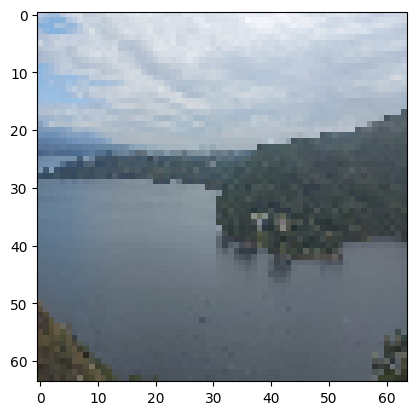

In [30]:
plt.imshow(image_vector[0]/255)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_vector, y, test_size=0.20, random_state=0)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=CLASSES)

In [38]:
y_train[200]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [39]:
model=build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                984096    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                      

In [40]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
9/9 [==============================] - 4s 372ms/step - loss: 34.4569 - accuracy: 0.7239 - val_loss: 9.9898 - val_accuracy: 0.8889
Epoch 2/50
9/9 [==============================] - 3s 376ms/step - loss: 5.3489 - accuracy: 0.9027 - val_loss: 1.4968 - val_accuracy: 0.8889
Epoch 3/50
9/9 [==============================] - 5s 539ms/step - loss: 3.3015 - accuracy: 0.7982 - val_loss: 1.7117 - val_accuracy: 0.8889
Epoch 4/50
9/9 [==============================] - 3s 324ms/step - loss: 0.9398 - accuracy: 0.8770 - val_loss: 2.0703 - val_accuracy: 0.8889
Epoch 5/50
9/9 [==============================] - 3s 318ms/step - loss: 0.8397 - accuracy: 0.9000 - val_loss: 0.5554 - val_accuracy: 0.8810
Epoch 6/50
9/9 [==============================] - 3s 315ms/step - loss: 0.4249 - accuracy: 0.8796 - val_loss: 0.3893 - val_accuracy: 0.8810
Epoch 7/50
9/9 [==============================] - 4s 465ms/step - loss: 0.4621 - accuracy: 0.8894 - val_loss: 0.4189 - val_accuracy: 0.8651
Epoch 8/50
9/9 [===

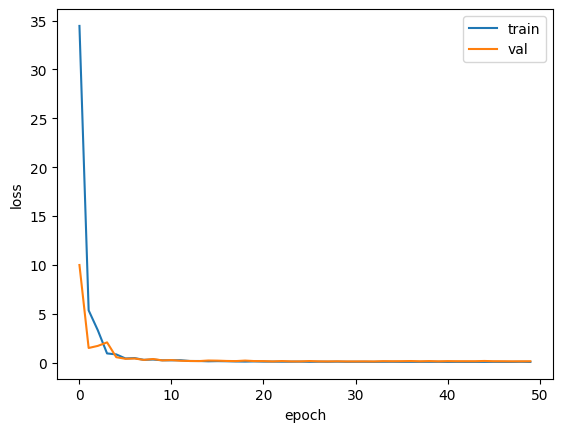

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

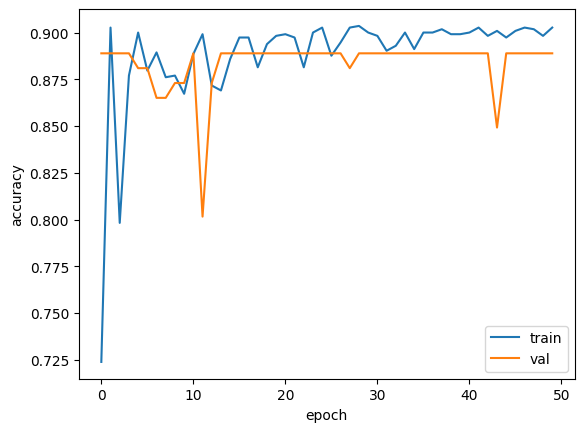

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [44]:
score = model.evaluate(X_test, y_test)
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 1s 51ms/step - loss: 0.1328 - accuracy: 0.8949

Test loss: 0.13280552625656128
Test accuracy: 0.8949044346809387


In [52]:
# 이미지 로드 및 전처리
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
img_path = '/content/b/w_24jpg'  # 이미지 파일 경로
img = image.load_img(img_path, target_size=(64, 64))  # ResNet50 기본 입력 크기에 맞게 조정
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [56]:
# 자전거, 바위, 나무, 물, 불, 빛, 눈, 산, 사과, 차
class_names = ['bicycle', 'rock', 'tree', 'water', 'fire', 'light', 'snow', 'mountain', 'apple', 'car']

In [57]:
# 이미지 예측 함수 정의
def predict_image(img_path, model):
    # 이미지 로드 및 사이즈 조정
    img = image.load_img(img_path, target_size=(32, 32))
    # 배열로 변환
    img_array = image.img_to_array(img)
    # 배치 차원 추가
    img_array = np.expand_dims(img_array, axis=0)

    # 예측 수행
    predictions = model.predict(img_array)

    # 여측결과로 가장 높은 확률을 가진 클래스 인덱스 return
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_index]

    print(f'Predicted class: {predicted_class_name}')
    print('Prediction performance (class probabilities):')
    for class_index, class_name in enumerate(class_names):
        print(f'{class_name}: {predictions[0][class_index]*100:.2f}%')

    return predicted_class_index

In [53]:
# 이미지에 대한 예측 생성
predictions = model.predict(x)

1/1 [==============================] - 0s 67ms/step


In [58]:
# 이미지 경로
img_path = '/content/b/w_14jpg'  # 다운로드한 이미지 경로로 변경
predicted_class = predict_image(img_path, model)
print(f'Predicted class: {predicted_class}')

InvalidArgumentError: Graph execution error:

Detected at node sequential_1/dense_2/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-58-21c02fe29773>", line 3, in <cell line: 3>

  File "<ipython-input-57-efbae18667b1>", line 11, in predict_image

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py", line 255, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [1,7200], In[1]: [30752,32]
	 [[{{node sequential_1/dense_2/Relu}}]] [Op:__inference_predict_function_5237]